# Predicting Yearly Land Average Temperature 📈
**Data from [climate-change-earth-surface-temperature-data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data)**

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

### Read file from Github
*** 
- Avoiding manipulating directly files for Google Colab users

In [2]:
import requests
from io import StringIO

url ="https://raw.githubusercontent.com/Selimmmm/spe1/fff081c86c6c17ae30b96f0f250f2c90cabfd09c/projets/projet_III/data/GlobalTemperatures.csv"
response = requests.get(url)
s = str(response.content, 'utf-8')
data = StringIO(s)
temperatures = pd.read_csv(data)

In [3]:
temperatures

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


#### Reading File

In [4]:
# temperatures = pd.read_csv('data/GlobalTemperatures.csv')

## Exploratory Data Analysis

In [5]:
temperatures.index = pd.to_datetime(temperatures.dt, format='%Y-%d-%m')
temperatures = temperatures.drop(columns=['dt'])

### What the dataframe looks like

In [6]:
temperatures.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-01-02,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-01-03,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-01-04,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-01-05,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


### Basic statistics for numeric variables

In [7]:
temperatures.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


### Min and max dates

In [8]:
min(temperatures.index) ,max(temperatures.index)

(Timestamp('1750-01-01 00:00:00'), Timestamp('2015-01-12 00:00:00'))

### Observe `LandAverageTemperature`

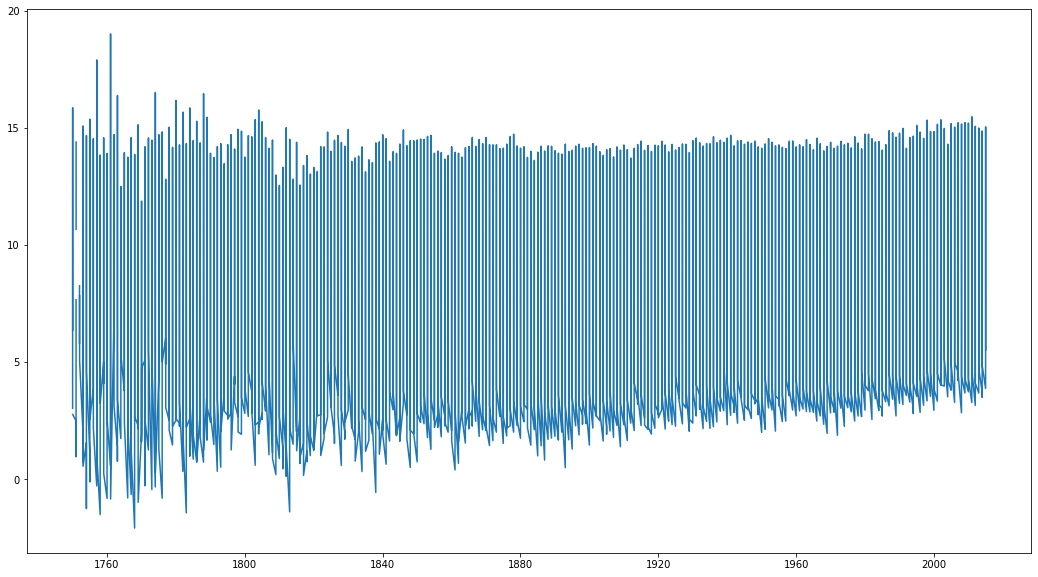

In [56]:
plt.figure(figsize=(18,10))
plt.plot(temperatures['LandAverageTemperature'])
plt.show()

### Yearly mean => smooth curve

In [57]:
temperatures

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-01-02,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-01-03,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-01-04,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-01-05,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-01-08,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-01-09,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-01-10,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


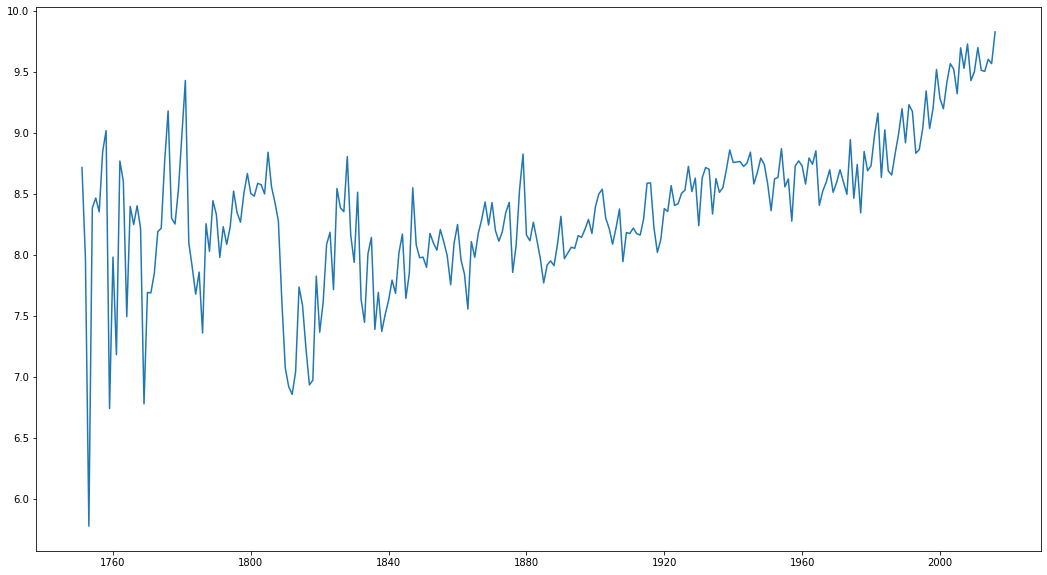

In [26]:
temperatures['Year'] = temperatures.index.year

yearly_data = temperatures['LandAverageTemperature'].asfreq('Y')
yearly_mean = yearly_data.resample('Y').mean()

df = temperatures.resample('Y').mean()

plt.figure(figsize=(18,10))
plt.plot(df['LandAverageTemperature'])
plt.show()

### Decomposition with additive model

[Official documentation: `statsmodels.seasonal_decompose`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

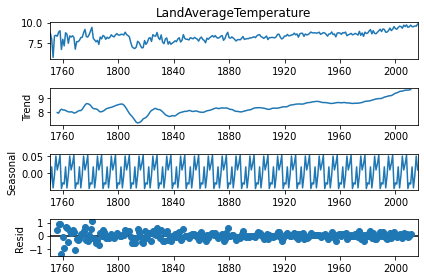

In [27]:
temperatures = temperatures.resample('D').mean().ffill()
decomposition = seasonal_decompose(df['LandAverageTemperature'], model='additive', period=10)
fig = decomposition.plot()

### Moving average

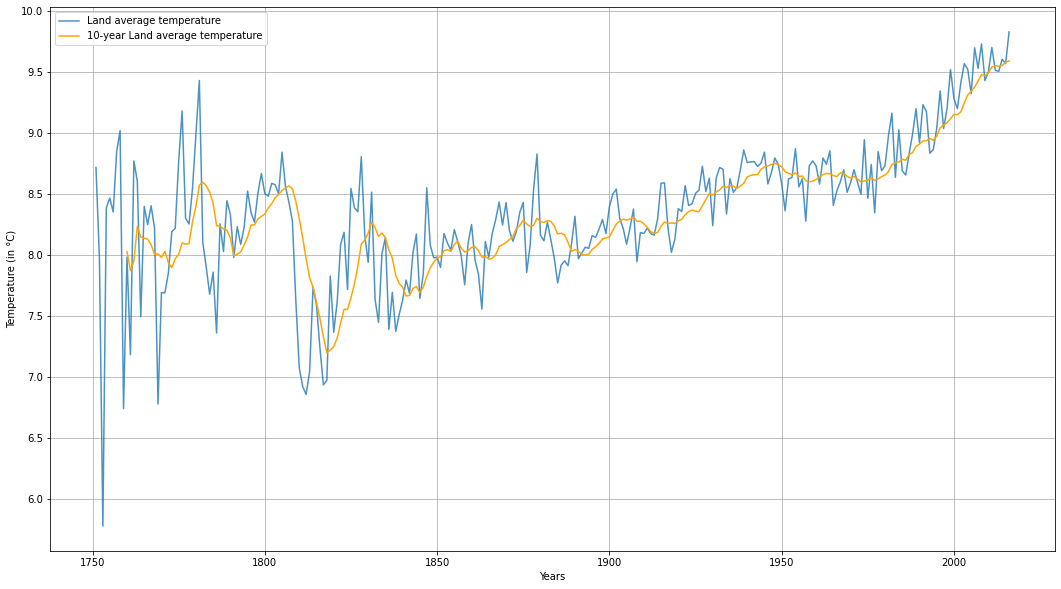

<Figure size 432x288 with 0 Axes>

In [59]:
temperature_px = df['LandAverageTemperature']
df['10'] = temperature_px.rolling(window=10).mean()

plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.plot(df['LandAverageTemperature'], alpha=0.8, label='Land average temperature')
ax.plot(df['10'], color="orange", label='10-year Land average temperature')
ax.set_xticks([
    datetime.datetime(year=1750, month=1, day=1),
    datetime.datetime(year=1800, month=1, day=1),
    datetime.datetime(year=1850, month=1, day=1),
    datetime.datetime(year=1900, month=1, day=1),
    datetime.datetime(year=1950, month=1, day=1),
    datetime.datetime(year=2000, month=1, day=1),
])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.grid()
plt.legend()
plt.show()
plt.clf()

## Build indicator

### Use a rolling mean on the yearly data

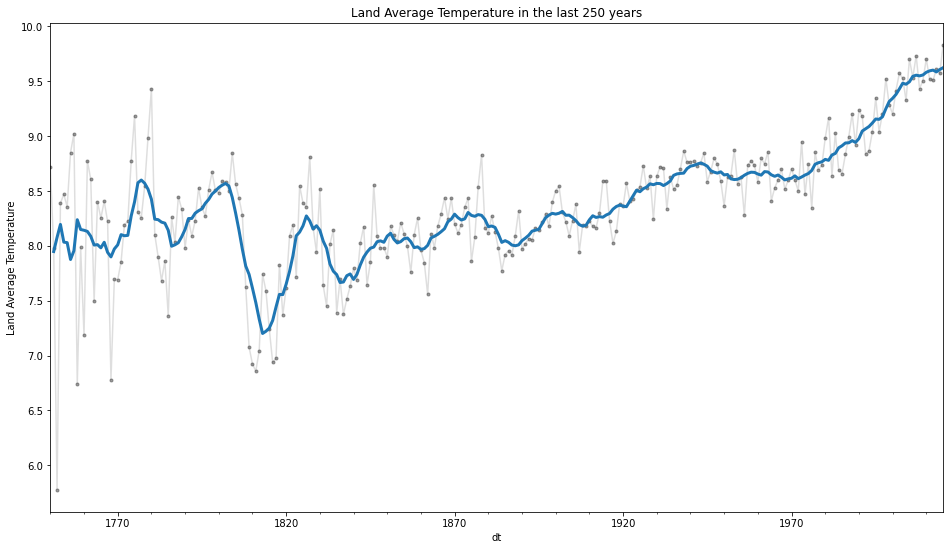

In [60]:
trend = df['LandAverageTemperature'].rolling(
    window=10,
    center=True,
    min_periods=6,
).mean()

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
ax = df['LandAverageTemperature'].plot(
    **plot_params, 
    alpha=0.5, 
    figsize=(16, 9)
)
ax = trend.plot(ax=ax, linewidth=3)
ax.set(title="Land Average Temperature in the last 250 years", ylabel="Land Average Temperature")
plt.show()

### Approximation (interpolation) with order = 3

In [61]:
from statsmodels.tsa.deterministic import DeterministicProcess

average_temperature = df['LandAverageTemperature']
y = average_temperature.copy()  # the target


dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)

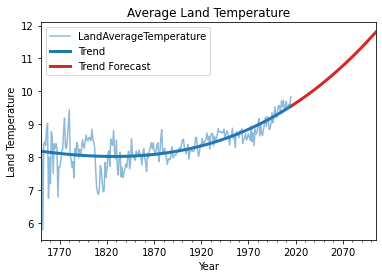

In [62]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(alpha=0.5, title="Average Land Temperature", ylabel="Land Temperature")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
plt.xlabel('Year')
ax.legend();

## Fit a linear regression model with the yearly data (since 1750)

In [32]:
corr, p = pearsonr(df.index.year, df['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.6223364823755806


In [64]:
lr

LinearRegression()

In [76]:
lr = LinearRegression()

X = df.index.year
X = X.values.reshape(-1,1)

y = df['LandAverageTemperature']
lr.fit(X, y)

y_pred = lr.predict(X)
years = pd.DataFrame(X)

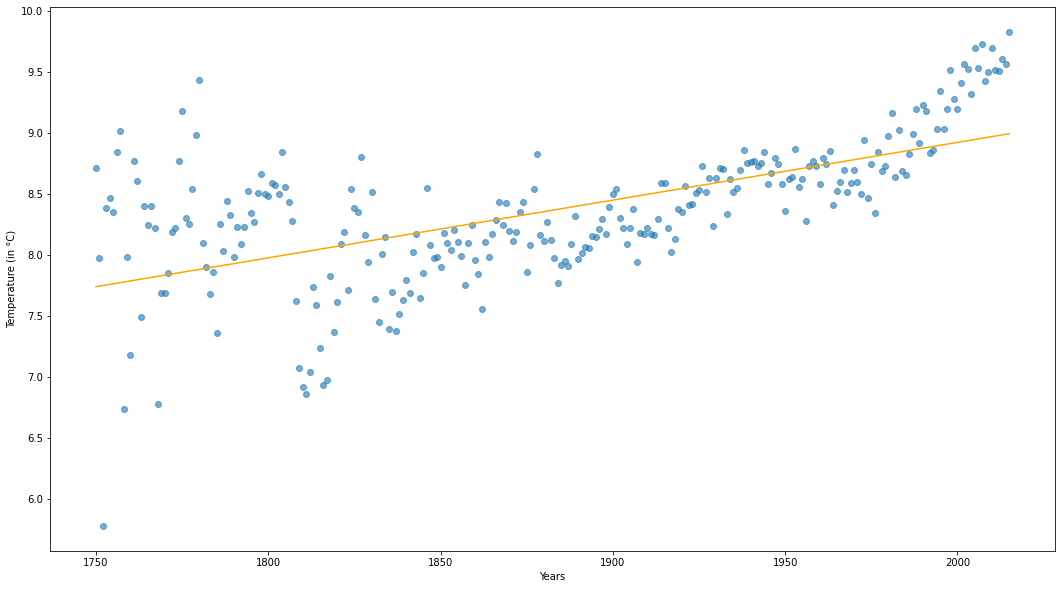

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [78]:
# lr.intercept_

-0.538073137395827

In [103]:
# print(lr.coef_)
# print(10 * lr.coef_)

In [86]:
x_pred_ind = [2124]
y_pred_ind = lr.predict(np.array([2124]).reshape(-1,1))

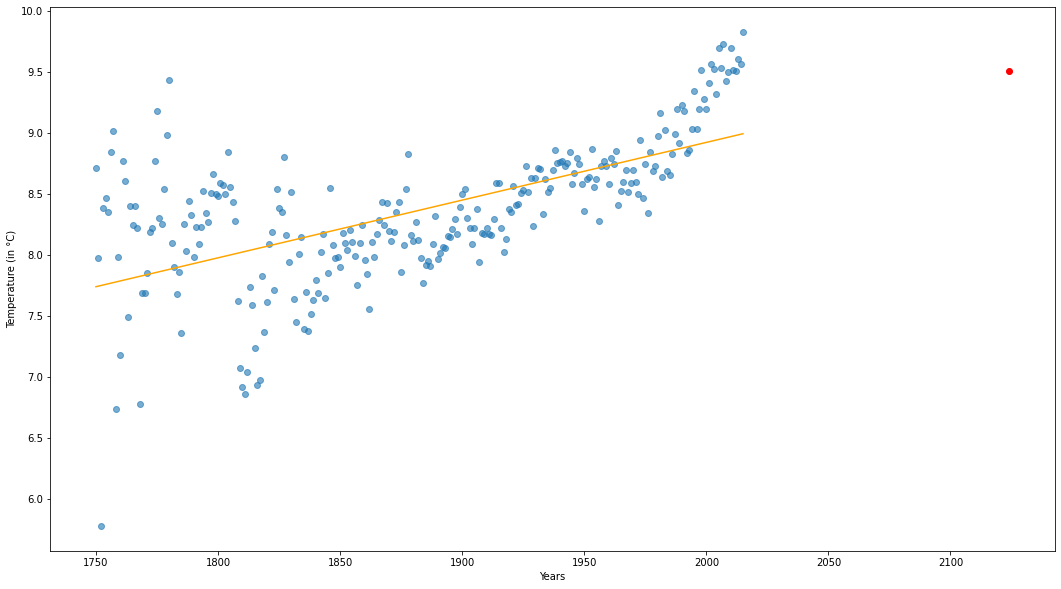

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')

plt.scatter(x_pred_ind, y_pred_ind, alpha=1, color="red")
plt.show()
plt.clf()

#### Interpretation

Every year, the average land temperature increases by an average of 0.0047 °C. Every ten years, the average land temperature increases by an average of 0.0473 °C.
The average land temperature in 2030 will be 9.067 °C and in 2050 9.162 °C.

## Fit a linear regression model with the yearly data (since 1850)

In [88]:
corr, p = pearsonr(df[df.index.year >= 1850].index.year, df[df.index.year >= 1850]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.865681931251089


In [89]:
lr = LinearRegression()

X = df[df.index.year >= 1850].index.year
y = df[df.index.year >= 1850]['LandAverageTemperature']
X = X.values.reshape(-1,1)

lr.fit(X, y)
y_pred = lr.predict(X)

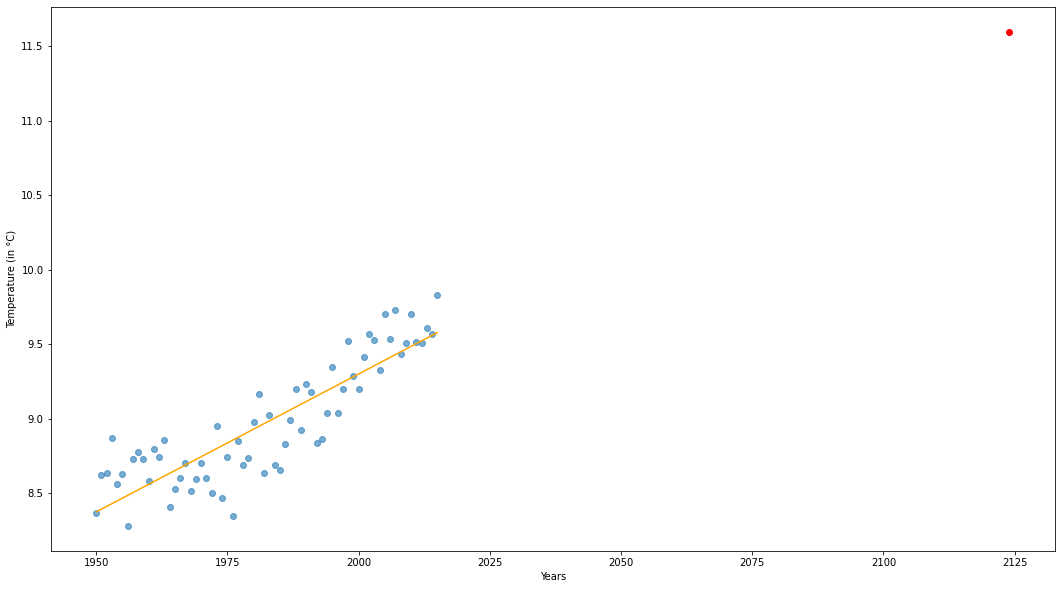

<Figure size 432x288 with 0 Axes>

In [102]:

plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)

x_pred_ind = [2124]
y_pred_ind = lr.predict(np.array([2124]).reshape(-1,1))

plt.scatter(x_pred_ind, y_pred_ind, alpha=1, color="red")


plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [92]:
print(lr.coef_)
print(10 * lr.coef_)

[0.00853155]
[0.08531553]


In [93]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[9.40340929 9.57404036]


#### Interpretation

Every year, the average land temperature increases by an average of 0.0085 °C. Every ten years, the average land temperature increases by an average of 0.0853 °C.
The average land temperature in 2030 will be 9.403 °C and in 2050 9.574 °C.

### Prediction in 100 years

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')

plt.scatter(x_pred_ind, y_pred_ind, alpha=1, color="red")
plt.show()
plt.clf()

In [94]:
print(lr.predict(np.array([2124]).reshape(-1,1)))

[10.20537531]


## Fit a linear regression model with the yearly data (since 1950)

In [95]:
corr, p = pearsonr(df[df.index.year >= 1950].index.year, df[df.index.year >= 1950]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.8698038878923113


Very strong positive correlation

In [96]:
lr = LinearRegression()

X = df[df['Year'] >= 1950].index.year
y = df[df.index.year >= 1950]['LandAverageTemperature']

X = X.values.reshape(-1,1)

lr.fit(X, y)

y_pred = lr.predict(X)

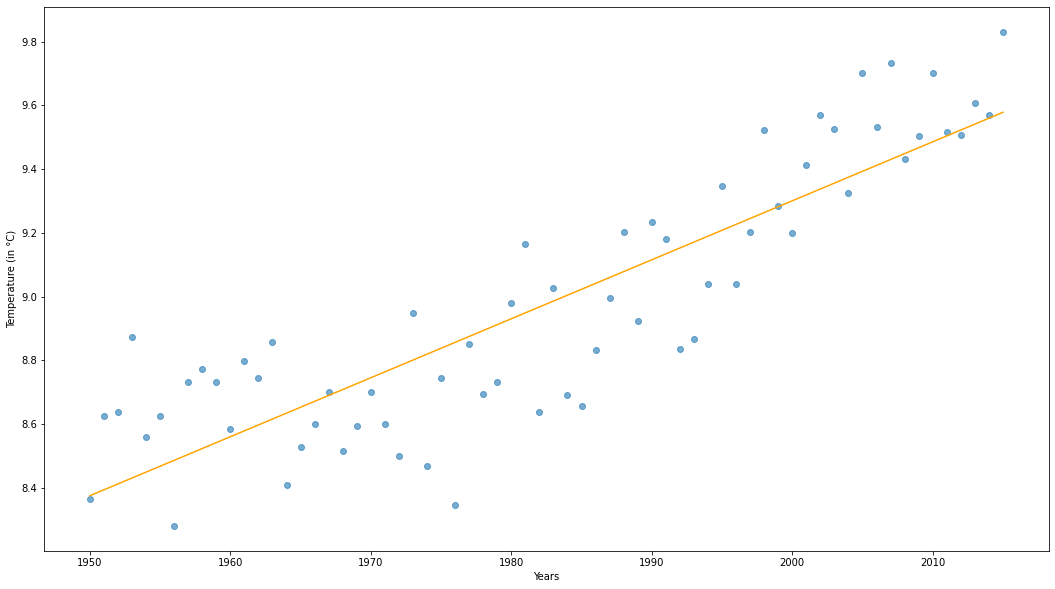

<Figure size 432x288 with 0 Axes>

In [97]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [98]:
print(lr.coef_)
print(lr.coef_ * 10)

[0.01851674]
[0.18516745]


In [99]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[ 9.85627013 10.22660503]


### Prediction in 100 years

In [100]:
print(lr.predict(np.array([2124]).reshape(-1,1)))

[11.59684416]


#### Interpretation

Every year, the average land temperature increases by an average of 0.0185 °C. Every ten years, the average land temperature increases by an average of 0.1852 °C.
The average land temperature in 2030 will be 9.856 °C and in 2050 10.227 °C.

***
***
***